In [1]:
#sklearn is a machine learning library in python
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.decomposition import PCA

In [2]:
train = pd.read_csv("train_KWH.csv")
train = train[train["month"] == 1]
train_y = train.pop("hourly_kwh")
train_X = train[["humidity","apparent_temperature","pressure","wind_bearing","hourly_solar_kWh"]]

In [3]:
pca = PCA(n_components=4)
test = pd.read_csv("test_KWH2.csv")[["humidity","apparent_temperature","pressure","wind_bearing","hourly_solar_kWh"]]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_X)
train_X_scaled = scaler.transform(train_X)

test_scaled = scaler.transform(test)
pca.fit(train_X_scaled)
train_X_scaled = pca.transform(train_X_scaled)
test_scaled = pca.transform(test_scaled)

In [4]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr = SVR(kernel='rbf', C = 1000, gamma = 1) 
svr.fit(train_X_scaled, train_y)
y_pred = svr.predict(test_scaled)
pd.DataFrame(y_pred).to_csv("preds.kwh", index=False, header = False)

In [5]:
train_X.describe()

,humidity,apparent_temperature,pressure,wind_bearing,hourly_solar_kWh
count,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,0.686355,50.247573,1021.595038,182.284983,0.501862
std,0.224873,13.356474,7.990496,111.323984,0.888603
min,0.080000,7.560000,997.440000,0.000000,-0.016136
25%,0.512500,41.037500,1016.432500,105.250000,-0.005131
50%,0.720000,52.080000,1021.205000,177.000000,-0.004375
75%,0.890000,60.035000,1026.722500,291.000000,0.576912
max,1.000000,75.420000,1043.500000,359.000000,3.620875


<AxesSubplot:title={'center':'humidity'}>

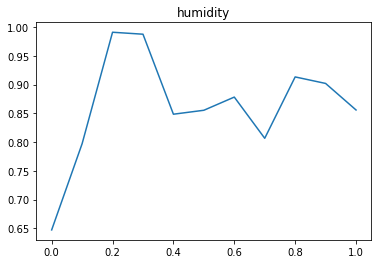

In [6]:
import matplotlib.pyplot as plt
probs = []
for j in range(11):
    train_mod = train_X
    train_mod = train_mod.assign(humidity = j/10)
    train_mod = scaler.transform(train_mod)
    train_mod = pca.transform(train_mod)
    this_prob = []
    data = svr.predict(train_mod)
    for i in range(156):
        this_prob.append(data[i])
    probs.append(np.mean(this_prob))

data = pd.Series(probs, index = range(11))
ind = data.index/10
data.index = ind
data.plot(title = 'humidity')

<AxesSubplot:title={'center':'apparent_temperature'}>

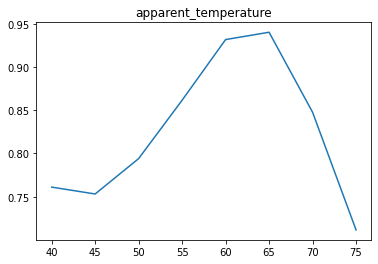

In [7]:
import matplotlib.pyplot as plt
probs = []
for j in range(40,80,5):
    train_mod = train_X
    train_mod = train_mod.assign(apparent_temperature = j)
    train_mod = scaler.transform(train_mod)
    train_mod = pca.transform(train_mod)
    this_prob = []
    data = svr.predict(train_mod)
    for i in range(156):
        this_prob.append(data[i])
    probs.append(np.mean(this_prob))

data = pd.Series(probs, index = range(40,80,5))
data.plot(title = 'apparent_temperature')

<AxesSubplot:title={'center':'pressure'}>

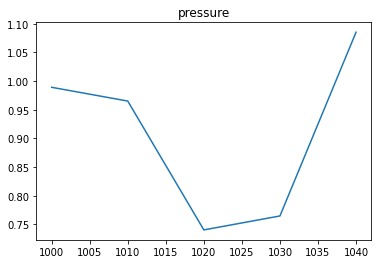

In [8]:
import matplotlib.pyplot as plt
probs = []
for j in range(1000, 1050, 10):
    train_mod = train_X
    train_mod = train_mod.assign(pressure = j)
    train_mod = scaler.transform(train_mod)
    train_mod = pca.transform(train_mod)
    this_prob = []
    data = svr.predict(train_mod)
    for i in range(156):
        this_prob.append(data[i])
    probs.append(np.mean(this_prob))

data = pd.Series(probs, index = range(1000, 1050, 10))
data.plot(title = 'pressure')

<AxesSubplot:title={'center':'wind_bearing'}>

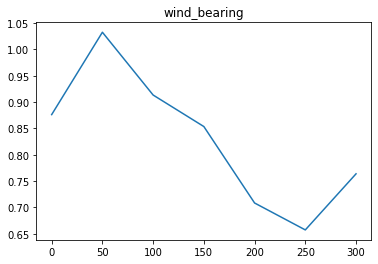

In [9]:
import matplotlib.pyplot as plt
probs = []
for j in range(0, 350, 50):
    train_mod = train_X
    train_mod = train_mod.assign(wind_bearing = j)
    train_mod = scaler.transform(train_mod)
    train_mod = pca.transform(train_mod)
    this_prob = []
    data = svr.predict(train_mod)
    for i in range(156):
        this_prob.append(data[i])
    probs.append(np.mean(this_prob))

data = pd.Series(probs, index = range(0, 350, 50))
data.plot(title = 'wind_bearing')

<AxesSubplot:title={'center':'hourly_solar_kWh'}>

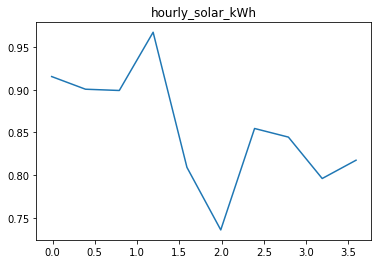

In [10]:
import matplotlib.pyplot as plt
probs = []
for j in range(-1, 360, 40):
    train_mod = train_X
    train_mod = train_mod.assign(hourly_solar_kWh = j/100)
    train_mod = scaler.transform(train_mod)
    train_mod = pca.transform(train_mod)
    this_prob = []
    data = svr.predict(train_mod)
    for i in range(156):
        this_prob.append(data[i])
    probs.append(np.mean(this_prob))

data = pd.Series(probs, index = range(-1, 360, 40))
ind = data.index/100
data.index = ind
data.plot(title = 'hourly_solar_kWh')